# K-Nearest Neighbors (KNN) Algorithm

## Step 1: Importing the necessary library and dataset
We start by importing the pandas library,and use the `pd.read_csv()` function to read the CSV file 'framinghamCVD_cleaned.csv' and store the data in a DataFrame `df`.

In [56]:
import pandas as pd
df=pd.read_csv('Dataset_cleaned.csv')

df_target_0 = df[df['TenYearCHD'] == 0] 
df_target_1 = df[df['TenYearCHD'] == 1]


## Step 2: Filtering and Data Splitting
We filter the DataFrame `df` based on the 'TenYearCHD' column values. Rows where 'TenYearCHD' is 0 are stored in `df_target_0` and rows where 'TenYearCHD' is 1 are stored in `df_target_1`.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X=df.drop(['TenYearCHD'],axis='columns')
y=df.TenYearCHD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Data Rows : ',len(X_train))
print('Testing Data Rows : ',len(X_test))

Training Data Rows :  2924
Testing Data Rows :  732


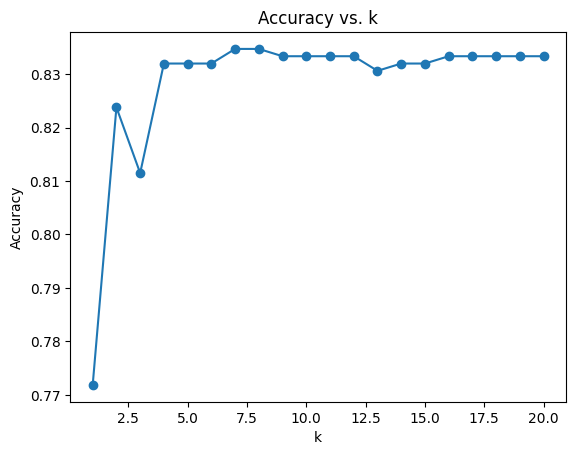

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define a range of k values to try
k_values = list(range(1, 21))

# Initialize empty lists to store accuracy scores
accuracy_scores = []

# Evaluate kNN for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy scores against k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()



at k=7.5 we get the most accuracy so we train the model with k=7.5


In [59]:

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [60]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 83.46994535519126 %
